## Dataset about Vinho Verde Wines
### Contains
<ul>
    <li>6497 kinds of wine</li>
    <li>11 different physichemical properties</li>
</ul>

### Objective
<p> Search for factors that correlate with a wine being high-quality.</p>

### Features
<b>Fixed Acidity:</b> Gives wine a tart flavor. If there's too little, wine tastes:"flat".

<b>Citric Acid:</b> Often used as a flavor additive. Adds a fresh, tart taste.

<b>Volatile Acidity:</b> In contrast to citric acid, which is a liquid, this is gaseous acidity that can smell like vinegar. Its presence is less likely to be intentional.

<b>Residual Sugar:</b> This is the sugar left over when grapes finish fermenting. Correlates with sweetness. “Dry wines” tend to have lower amounts.

<b>Sulfur:</b> Additive to prevent bacterial growth. In my research, it was contested whether or not there is a smell or taste associated with it.

<b>Chlorides:</b> The measure of salt.

#### Import Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
#from matplotlib import rcParams

In [18]:
sns.__version__

'0.9.0'

#### Import the wine dataset

In [2]:
wine_data_df = pd.read_csv("vinhoVerde.csv").sort_values(by="quality", ascending=True)

#### Examine the features

In [3]:
wine_data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
5409,6.8,0.260,0.34,15.10,0.060,42.0,162.0,0.99705,3.24,0.52,10.5,3,white
2339,6.9,0.390,0.40,4.60,0.022,5.0,19.0,0.99150,3.31,0.37,12.6,3,white
3016,8.6,0.550,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3,white
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3,red
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,red


#### Examine statistics of the wine dataset

In [4]:
wine_data_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### Summary of the Wine Dataset

In [5]:
wine_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 5409 to 3204
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


#### Lets separate white and red wine

In [6]:
white_wine_df = wine_data_df.loc[(wine_data_df["type"] == "white")]

red_wine_df = wine_data_df.loc[(wine_data_df["type"] == "red")]

#### Graph the distribution so we can see how many red vs white bottles we've

quality  type 
3        red        10
         white      20
4        red        53
         white     163
5        red       681
         white    1457
6        red       638
         white    2198
7        red       199
         white     880
8        red        18
         white     175
9        white       5
dtype: int64

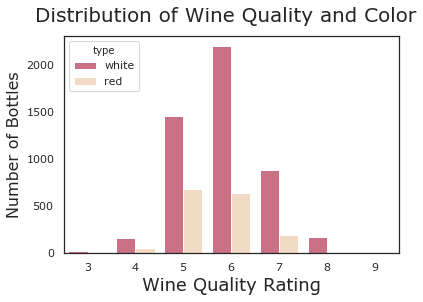

In [56]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.sans-serif'] = ['Verdana']
plt.suptitle("Distribution of Wine Quality and Color", fontsize=20)
plt.xlabel("xlabel", fontsize=18)
plt.ylabel("ylabel", fontsize=16)

ax = sns.countplot(x="quality",
                  hue="type",
                  data=wine_data_df,
                  palette=["#da627d", "#f9dbbd"])

ax.set(xlabel="Wine Quality Rating", ylabel="Number of Bottles")

wine_data_df.groupby(["quality", "type"]).size()


<p> From the above distribution we get an idea that we have an imbalance in our data. So if we were to train a machine learning model with this dataset, it would be quite problematic. Why? Because certain categories over or under-represented, so unless we do an intervention, it could lead to a situation where our model is becoming biased.</p>

#### Is there any difference in chemical composition between different ratings of wine?

<blockquote>If quality is just a rating of a flavor, and flavor is a mixture of chemicals, wines with different ratings should have different chemical ratios, right?</blockquote>

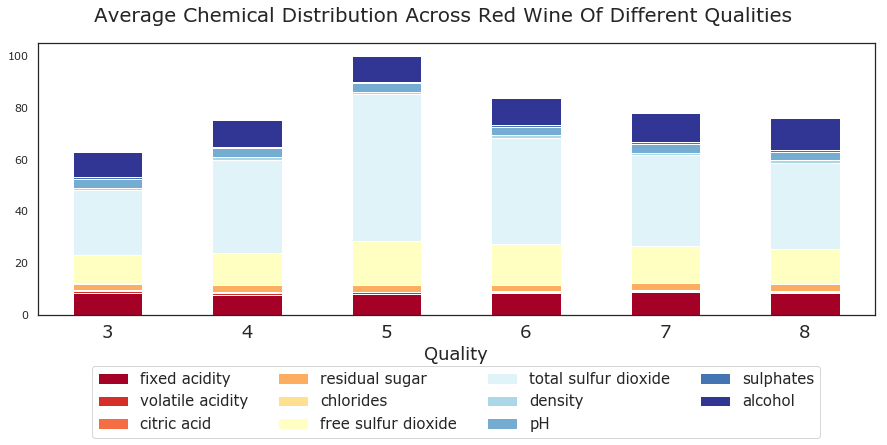

In [55]:
red_wine_df.groupby(["quality"]).mean().plot.bar(
        stacked=True, cmap="RdYlBu", figsize=(15,5)
)

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.sans-serif'] = ['Verdana']
plt.suptitle(
    "Average Chemical Distribution Across Red Wine Of Different Qualities", fontsize=20
)
plt.xticks(size=18, rotation="horizontal")
plt.xlabel("Quality", fontsize=18)

plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.48), ncol=4, fontsize=15)

At first glance, the chemicals follow a bell-curve like distribution and notice an 8-star wine looks not much different than a 4-star wine, sound intuitive, doesn't it? I think the data is scattered across too many wine-quality groupings, lets try creating meaningful groupings to gain insight.  

#### Let's categorize red wine as "Terrible", "Average" & "Phenomenal"

In [57]:
category = []

for row in red_wine_df['quality']:
    if row >= 7 : category.append('Phenomenal')
    elif row <= 4: category.append('Terrible')
    else:
        category.append('Average')
        
red_wine_df.loc[:, ['category']] = category

#### Let's remove the rating since we no longer need to differentiate based off of it

In [59]:
red_wine_df.drop(['quality'], axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,category
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.200000,red,Terrible
1238,8.1,0.730,0.00,2.5,0.081,12.0,24.0,0.99798,3.38,0.46,9.600000,red,Terrible
1239,6.5,0.670,0.00,4.3,0.057,11.0,20.0,0.99488,3.45,0.56,11.800000,red,Terrible
1293,7.5,0.755,0.00,1.9,0.084,6.0,12.0,0.99672,3.34,0.49,9.700000,red,Terrible
633,10.1,0.935,0.22,3.4,0.105,11.0,86.0,1.00100,3.43,0.64,11.300000,red,Terrible
1369,6.6,0.610,0.00,1.6,0.069,4.0,8.0,0.99396,3.33,0.37,10.400000,red,Terrible
1124,6.5,0.580,0.00,2.2,0.096,3.0,13.0,0.99557,3.62,0.62,11.500000,red,Terrible
647,8.3,0.845,0.01,2.2,0.070,5.0,14.0,0.99670,3.32,0.58,11.000000,red,Terrible
1307,6.8,0.680,0.09,3.9,0.068,15.0,29.0,0.99524,3.41,0.52,11.100000,red,Terrible
409,12.5,0.460,0.49,4.5,0.070,26.0,49.0,0.99810,3.05,0.57,9.600000,red,Terrible


#### Let's customize how the X axis is sorted. 

In [60]:
red_wine_df.loc[:,['category']] = pd.Categorical(red_wine_df['category'], ['Terrible', 'Average', 'Phenomenal'])
red_wine_df = red_wine_df.sort_values(by='category')

#### Let's group it by quality category

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
category,,,,,,,,,,,,
Terrible,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
Average,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
Phenomenal,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


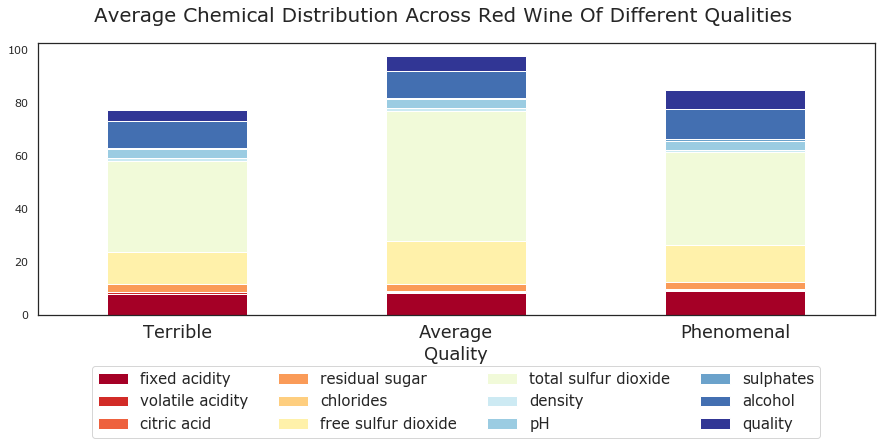

In [61]:
red_wine_df.groupby(["category"]).mean().plot.bar(
    stacked=True, cmap="RdYlBu", figsize=(15, 5)
)

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.sans-serif'] = ['Verdana']
plt.suptitle(
    "Average Chemical Distribution Across Red Wine Of Different Qualities", fontsize=20
)
plt.xticks(size=18, rotation="horizontal")
plt.xlabel("Quality", fontsize=18)

plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.48), ncol=4, fontsize=15)

red_wine_df.groupby("category").mean()

### What trends do we see in red wines?

<blockquote>By grouping our wines more intuitively, we uncover a few valuable relationships.</blockquote>

<strong>1. Low Salt: </strong>On average, the worst red wines have greatest amount of chlorides. This makes sense given chlorides measured that "salty" character. "Phenomenal" wine has the least.

<strong>2. Acidity Matters: </strong>"phenomenal" wines have the least amount of volatile acidity, and the greatest amount of citric acid. Given what we know about wine acids, this makes sense: the citric acid was likely deliberately introduced because it gives the wine a pleasant taste, but the volatile acids were likely a product of poor fermentation.

<strong>3. Alcohol is the King: </strong>The best wines have the most alcohol.

#### Let's see if there are any other correlations between chemicals present in the wine

Text(0.5, 1.0, 'Correlations Between Compunds in Red Wine')

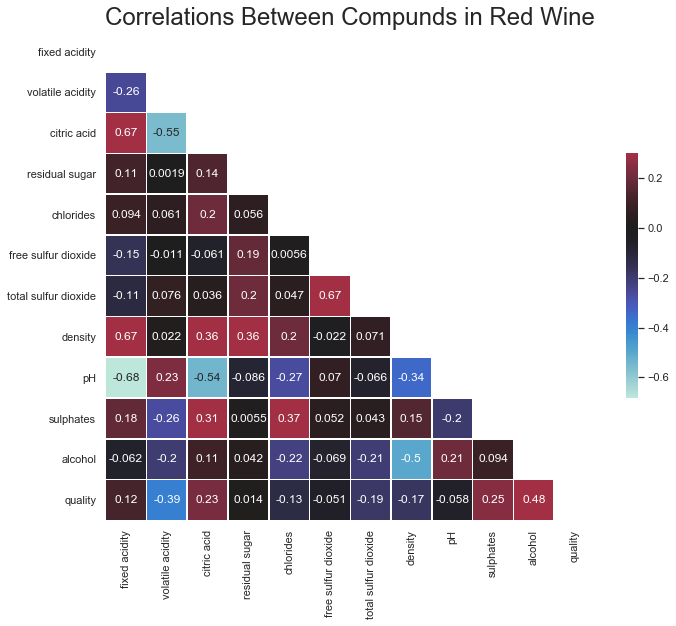

In [19]:
sns.set_style("white")
corr = red_wine_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(
corr,
    mask=mask,
    cmap="icefire",
    annot=True,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

plt.title("Correlations Between Compunds in Red Wine", size=24)

<p>From the above heatmap we can observe - for red wine, alcohol content has relatively strong correlation with wine quality rating(.48), followed by volatile acidity(-.39).</p>

<p>Few other correlations to notice is that alcohol is less dense than water, so it makes sense that more alcohol would be correlated with a lower wine density.</p>

<p>Likewise we would expect there to be a strong correlation between pH and Acidity, given pH measures whether a substance leans towards being acid or a base.</p>

#### Could it really be that best red wines are just the ones with highest alcohol content?

<blockquote>Well this model does not take into consideration other factor like soul of the wine-the fruity notes. Until then picking the wine with highest alcohol content will increase the odds of us choosing a high quality bottle</blockquote>

Text(0.5, 1.0, 'Alcohol vs. Sugar Content In Each Category of Wine')

<Figure size 432x288 with 0 Axes>

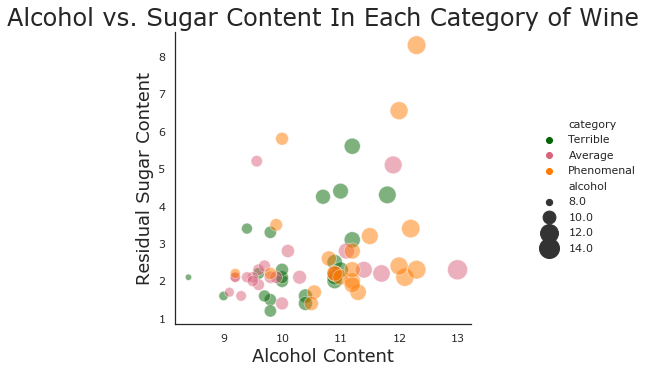

In [62]:
# Because there's an imblance of wines in the dataset
# let's only grab 22 of each category so it doesn't
# skew the plot

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.sans-serif'] = ['Verdana']
plt.suptitle(
    "Average Chemical Distribution Across Red Wine Of Different Qualities", fontsize=20
)

sns.relplot(
    x="alcohol",
    y="residual sugar",
    hue="category",
    size="alcohol",
    sizes=(40, 400),
    alpha=0.5,
    palette=["#006400", "#da627d", "#ff7b00"],
    height=5,
    data=red_wine_df.groupby("category")
    .apply(lambda x: x.sample(22))
    .reset_index(drop=True),
)

plt.xlabel("Alcohol Content", size=18)
plt.ylabel("Residual Sugar Content", size=18)

plt.title("Alcohol vs. Sugar Content In Each Category of Wine", size=24)

#### Is there a difference in the correlations for a high quality white wine?

Text(0.5, 1.0, 'Correlations Between Compunds in White Wine')

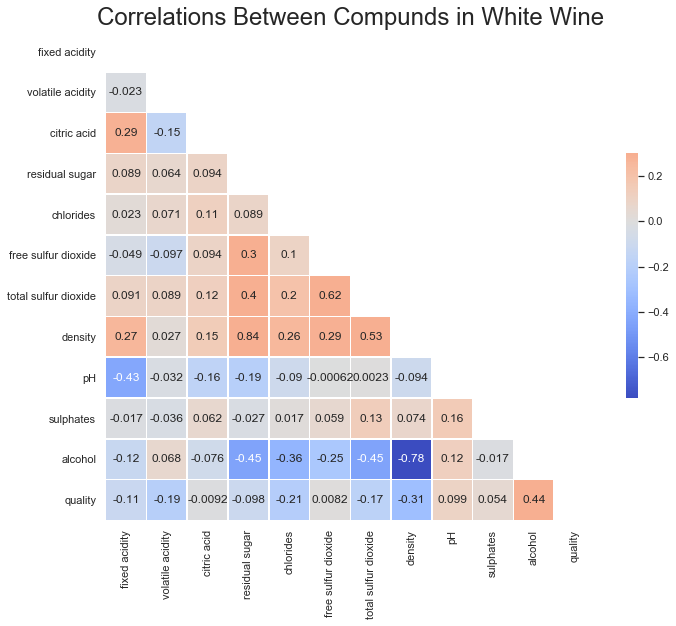

In [21]:
sns.set_style("white")
corr = white_wine_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(
corr,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

plt.title("Correlations Between Compunds in White Wine", size=24)

<p> At first glance, we seen that even for white wines, alcohol content has the most positive correlation with quality</p>

<blockquote>Compared to red wines, for which the presence of citric acid had a 20% correlation with quality, the white wines had a 0% correlation between citric acid and quality.</blockquote>

<p>Hypothesizing citric acid is an additive that is deliberately added to red wine to enhance its flavor, it is unlikely a lower quality red bottle of wine would have had it added.</p>

<p>Not sure if the differences occur because citric acid naturally exists in higher concentrations in white wine, or if it is a more common practice to add it to white wine</p>

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
category,,,,,,,,,,,,
Terrible,7.180874,0.375984,0.307705,4.821038,0.050557,26.633880,130.232240,0.994343,3.183388,0.475956,10.173497,3.890710
Average,6.876060,0.277086,0.337877,6.797729,0.047740,35.962107,142.571272,0.994480,3.180720,0.487557,10.269808,5.601368
Exceptional,6.725142,0.265349,0.326057,5.261509,0.038160,34.550472,125.245283,0.992412,3.215132,0.500142,11.416022,7.174528


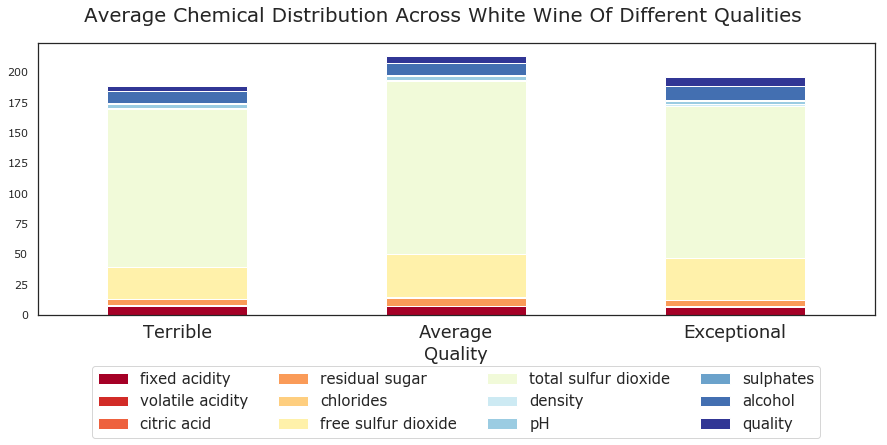

In [63]:
category = []

for row in white_wine_df['quality']:
    if row >= 7 : category.append('Exceptional')
    elif row <= 4: category.append('Terrible')
    else:
        category.append('Average')
        
white_wine_df.loc[:,['category']] = category

white_wine_df.drop(['quality'], axis=1)

white_wine_df.loc[:,['category']] = pd.Categorical(white_wine_df['category'], ['Terrible', 'Average', 'Exceptional'])
white_wine_df = white_wine_df.sort_values(by='category')

white_wine_df.groupby(["category"]).mean().plot.bar(
    stacked=True, cmap="RdYlBu", figsize=(15, 5)
)

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.sans-serif'] = ['Verdana']
plt.suptitle(
    "Average Chemical Distribution Across White Wine Of Different Qualities", fontsize=20
)
plt.xticks(size=18, rotation="horizontal")
plt.xlabel("Quality", fontsize=18)

plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.48), ncol=4, fontsize=15)

white_wine_df.groupby("category").mean()

<p>At chemical level, great white wines had 2-4 times the amount of sulfur than their red counterparts.</p>

<p>From what we learned about sulfure as an additive to prevent spoilage, unless white wine have more naturally occuring sulfur, it is possible that to ferment them necessitates extra protection as opposed to red(just as red wine benefits from the addition of citric acid).</p>

<p>Additionally, white wines had half the amount of chlorides the reds did, but nearly twice as much sugar. They were also slightly less acidic.</p>

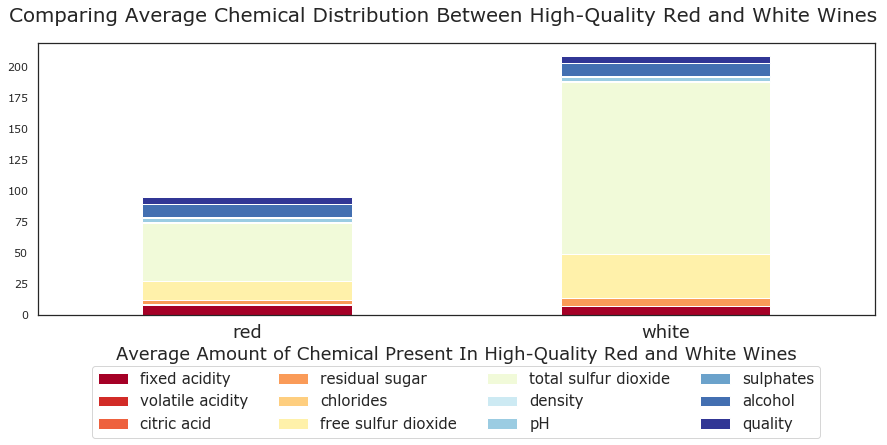

In [64]:
wine_data_df.groupby(["type"]).mean().plot.bar(
    stacked=True, cmap="RdYlBu", figsize=(15, 5)
)
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.sans-serif'] = ['Verdana']
plt.suptitle(
    "Comparing Average Chemical Distribution Between High-Quality Red and White Wines", fontsize=20
)
plt.xticks(size=18, rotation="horizontal")
plt.xlabel("Average Amount of Chemical Present In High-Quality Red and White Wines", fontsize=18)

plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.48), ncol=4, fontsize=15)

<strong>Despite these differences, the alcohol content of high-quality red and white wines was roughly the same.</strong>

<blockquote>Whether red or white, I think consumer would be happy with nearly any bottle with a high alcohol content. Citric acid content won't make a difference when purchasing a white bottle, but it will often make or break your red.</blockquote>